<a href="https://colab.research.google.com/github/alfinarhmdna/Python/blob/main/projectSpreadingDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

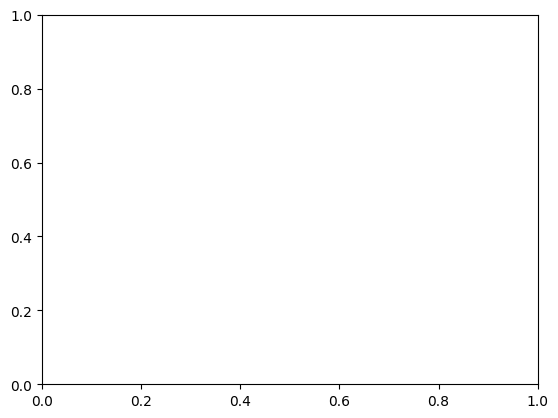

In [1]:
# Asumsi:
#
# 1) L: Grid berukuran 25x25, dengan tiap cellnya terdapat individu
# 2) Nilai cell = 0         -> Individu susceptible
#                 1,2       -> Individu infectious, hari ke-
#                 3,4,5,6,7 -> Individu immune, hari ke-(minus 2)
# 3) Infeksi bertahan 2 hari, setelahnya menjadi immune
# 4) Imunitas bertahan 5 hari, setelahnya kembali menjadi susceptible
# 5) Tetangga adalah individu yang berada di cell utara, barat, timur dan selatan
#
# Referensi animasi: https://matplotlib.org/gallery/animation/dynamic_image.html

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as pltcol
import matplotlib.animation as animation

fig, ax = plt.subplots()
ims = []

In [2]:
def CetakGrid(Grid, Hari):

  # Pewarnaan:
  #
  # Susceptible : Hijau
  # Infectious  : Biru (hari ke-1) -> Biru muda (hari ke-2)
  # Immune      : Merah (hari ke-1) -> Merah paling muda (hari ke-5)

  # https://www.google.com/search?q=color+picker

  # Detail fungsi di bawah ada di laman berikut:
  # https://stackoverflow.com/questions/47776318/plotting-a-2d-numpy-array-with-custom-colors

  Lcol = {0: [0, 255, 0],
          1: [64, 64, 255],
          2: [109, 109, 194],
          3: [50, 0, 0],
          4: [201, 0, 0],
          5: [227, 70, 70],
          6: [204, 98, 98],
          7: [252, 220, 220]}

  image = np.array([[Lcol[val] for val in row] for row in Grid], dtype='B')
  title = ax.text(0.5,1.05,"Hari ke-{}".format(str(Hari)),
                  size=plt.rcParams["axes.titlesize"],
                  ha="center", transform=ax.transAxes, )
  plt.imshow(image)
  plt.show()

  im = ax.imshow(image, animated=True)
  ims.append([im, title])

In [3]:
# Inisialisasi Grid L:
#
# probSusceptible% * (25*25) -> 0
# probInfectious% * (25*25) / 2 -> 1
# probInfectious% * (25*25) / 2 -> 2
# probImmune% * (25*25) / 5 -> 3
# probImmune% * (25*25) / 5 -> 4
# probImmune% * (25*25) / 5 -> 5
# probImmune% * (25*25) / 5 -> 6
# probImmune% * (25*25) / 5 -> 7
#
# probSusceptible + probInfectious + probImmune = 1
# probSusceptible >= 0, probInfectious >= 0, probImmune >= 0

L = np.zeros((25, 25))

probSusceptible = float(input("probSusceptible (%) = "))
probInfectious = float(input("probInfectious (%) = "))
iteration = int(input("iteration = "))

probImmune = 100 - int(probInfectious+probSusceptible)
probSusceptible = float(probSusceptible/100)
probInfectious = float(probInfectious/100)
probImmune = float(probImmune/100)

print("probSusceptible :", probSusceptible)
print("probInfectious :", probInfectious)
print("probImmune :", probImmune)

# Hitung jumlah individu tiap golongan berdasarkan formula diatas

GolIndividu = np.zeros(8)

GolIndividu[0] = probSusceptible*(25*25)
GolIndividu[1] = probInfectious*(25*25)/2
GolIndividu[2] = probInfectious*(25*25)/2
GolIndividu[3] = probImmune*(25*25)/5
GolIndividu[4] = probImmune*(25*25)/5
GolIndividu[5] = probImmune*(25*25)/5
GolIndividu[6] = probImmune*(25*25)/5
GolIndividu[7] = probImmune*(25*25)/5

print("Jumlah Individu Per Golongan (Sebelum Normalisasi):")
display(pd.DataFrame(GolIndividu))

# Ada kemungkinan hasil bagi di atas tidak bulat, sehingga perlu dinormalkan

jmlDesimal = 0
for i in range(8):
  sisaDesimal = GolIndividu[i] % 1
  jmlDesimal = jmlDesimal + sisaDesimal
  GolIndividu[i] = GolIndividu[i] - sisaDesimal

for i in range(8):
  if (jmlDesimal > 0):
    GolIndividu[i] = GolIndividu[i] + 1
    jmlDesimal = jmlDesimal - 1

print("Jumlah Individu Per Golongan (Setelah Normalisasi):")
display(pd.DataFrame(GolIndividu))

# Fungsi di bawah memetakan GolIndividu ke L secara acak

for i in range(1,8):
  while(GolIndividu[i] > 0):
    TaruhX = random.randint(0,24)
    TaruhY = random.randint(0,24)
    if (L[TaruhX][TaruhY] == 0):
      L[TaruhX][TaruhY] = i
      GolIndividu[i] = GolIndividu[i] - 1

print("Hasil Pemetaan Individu ke Grid L pada Kondisi Awal:")
display(pd.DataFrame(L))

probSusceptible (%) = 10
probInfectious (%) = 10
iteration = 25
probSusceptible : 0.1
probInfectious : 0.1
probImmune : 0.8
Jumlah Individu Per Golongan (Sebelum Normalisasi):


,0
0,62.50
1,31.25
2,31.25
3,100.00
4,100.00
5,100.00
6,100.00
7,100.00


Jumlah Individu Per Golongan (Setelah Normalisasi):


,0
0,63.0
1,31.0
2,31.0
3,100.0
4,100.0
5,100.0
6,100.0
7,100.0


Hasil Pemetaan Individu ke Grid L pada Kondisi Awal:


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3.0,1.0,4.0,3.0,0.0,6.0,6.0,5.0,7.0,5.0,...,4.0,4.0,3.0,3.0,1.0,7.0,4.0,2.0,4.0,1.0
1,5.0,3.0,2.0,2.0,5.0,2.0,7.0,5.0,0.0,2.0,...,7.0,6.0,5.0,5.0,5.0,6.0,6.0,7.0,7.0,4.0
2,4.0,6.0,6.0,2.0,3.0,7.0,4.0,0.0,6.0,4.0,...,7.0,4.0,4.0,6.0,1.0,4.0,6.0,0.0,4.0,4.0
3,4.0,5.0,3.0,5.0,3.0,1.0,6.0,4.0,3.0,4.0,...,7.0,4.0,3.0,6.0,3.0,5.0,7.0,5.0,3.0,5.0
4,6.0,3.0,4.0,4.0,0.0,6.0,6.0,7.0,4.0,7.0,...,6.0,5.0,7.0,4.0,3.0,3.0,7.0,0.0,5.0,5.0
5,7.0,3.0,2.0,4.0,5.0,5.0,3.0,5.0,7.0,0.0,...,0.0,2.0,6.0,3.0,6.0,5.0,5.0,6.0,5.0,4.0
6,6.0,6.0,5.0,1.0,5.0,3.0,4.0,3.0,3.0,6.0,...,1.0,6.0,0.0,7.0,2.0,5.0,7.0,6.0,5.0,0.0
7,6.0,3.0,1.0,4.0,3.0,7.0,7.0,5.0,6.0,0.0,...,5.0,7.0,5.0,1.0,4.0,3.0,6.0,0.0,7.0,3.0
8,3.0,0.0,7.0,3.0,5.0,0.0,3.0,4.0,0.0,6.0,...,1.0,3.0,0.0,0.0,6.0,2.0,0.0,7.0,6.0,5.0
9,7.0,6.0,5.0,0.0,4.0,5.0,0.0,3.0,7.0,0.0,...,5.0,0.0,2.0,1.0,5.0,3.0,4.0,6.0,5.0,5.0


Kondisi Awal Lingkungan :


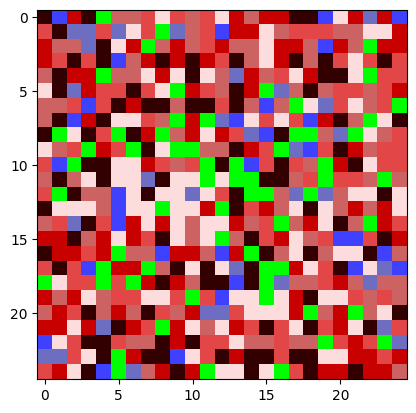

In [4]:
print("Kondisi Awal Lingkungan :")
CetakGrid(L, 0)

Kondisi Lingkungan Setelah 1 Hari :


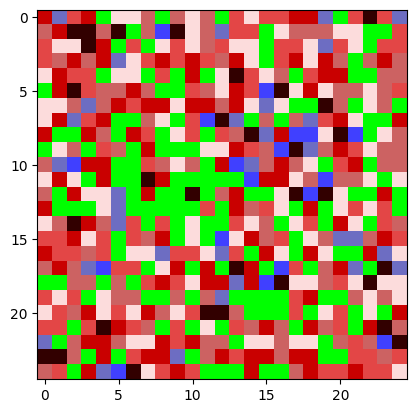

Kondisi Lingkungan Setelah 2 Hari :


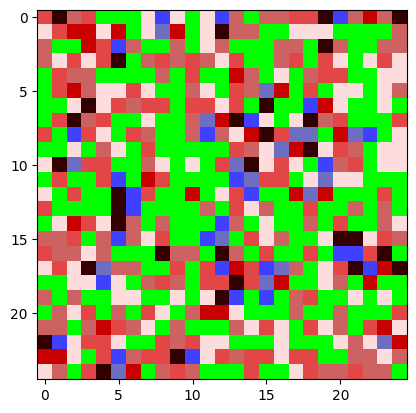

Kondisi Lingkungan Setelah 3 Hari :


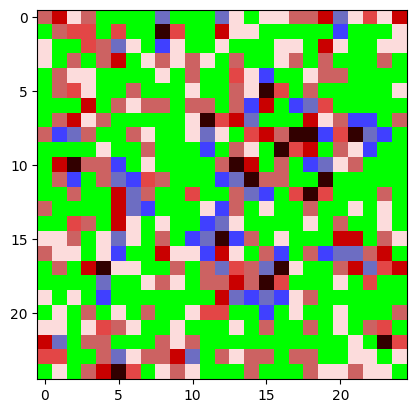

Kondisi Lingkungan Setelah 4 Hari :


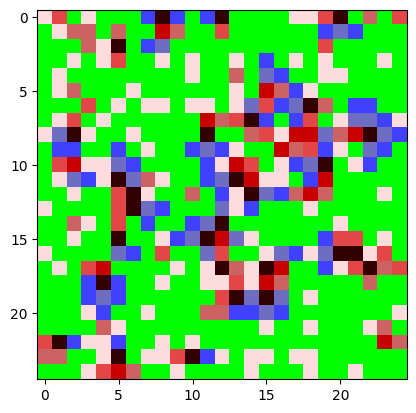

Kondisi Lingkungan Setelah 5 Hari :


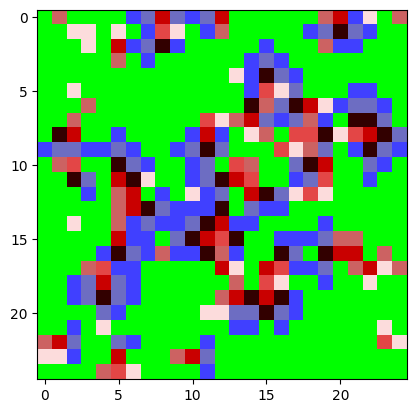

Kondisi Lingkungan Setelah 6 Hari :


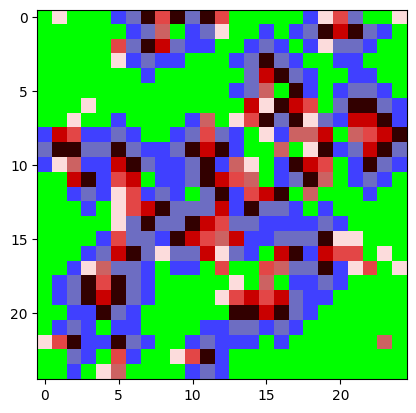

Kondisi Lingkungan Setelah 7 Hari :


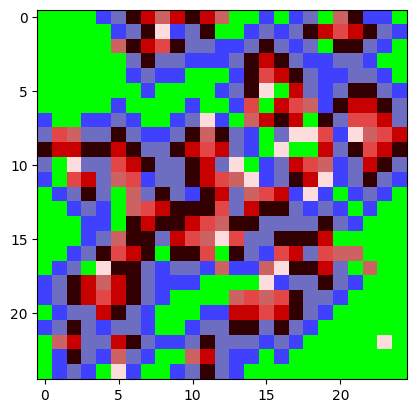

Kondisi Lingkungan Setelah 8 Hari :


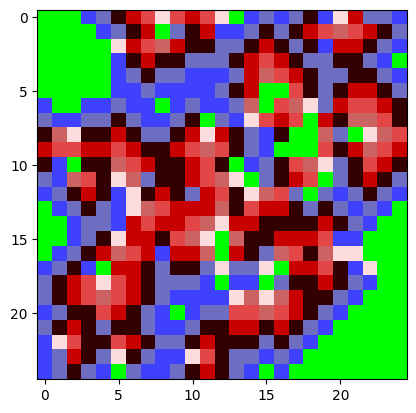

Kondisi Lingkungan Setelah 9 Hari :


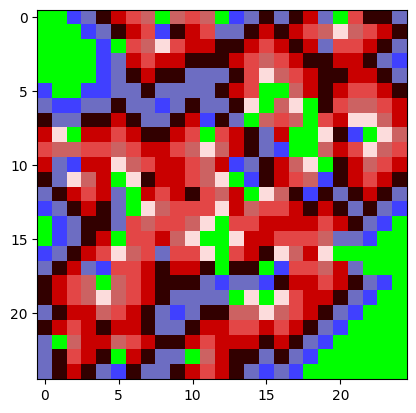

Kondisi Lingkungan Setelah 10 Hari :


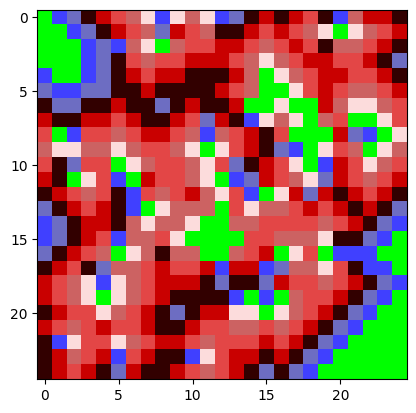

Kondisi Lingkungan Setelah 11 Hari :


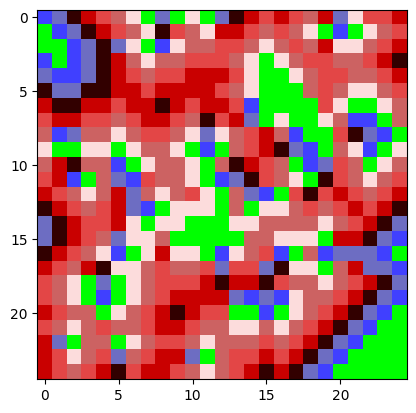

Kondisi Lingkungan Setelah 12 Hari :


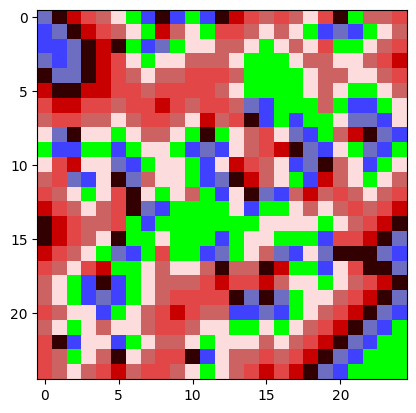

Kondisi Lingkungan Setelah 13 Hari :


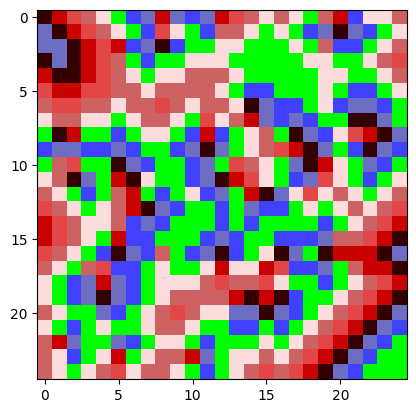

Kondisi Lingkungan Setelah 14 Hari :


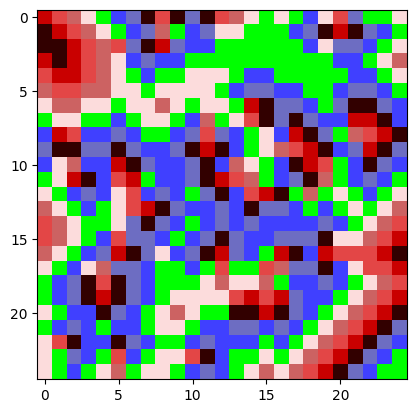

Kondisi Lingkungan Setelah 15 Hari :


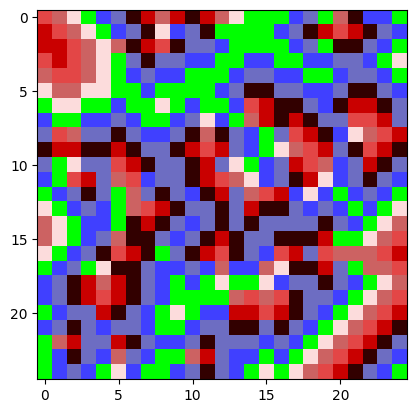

Kondisi Lingkungan Setelah 16 Hari :


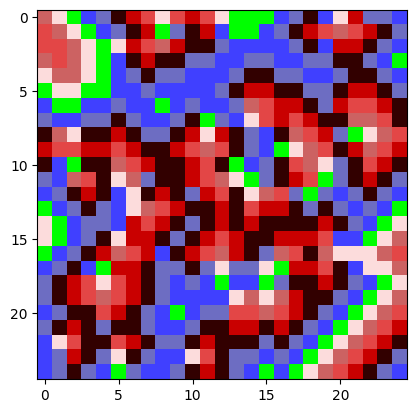

Kondisi Lingkungan Setelah 17 Hari :


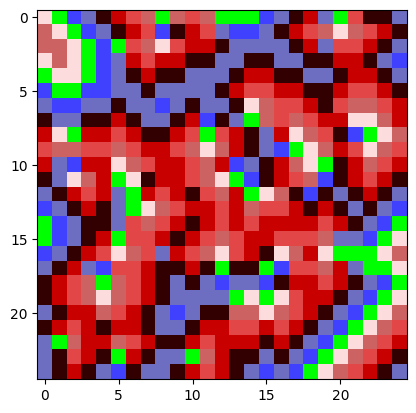

Kondisi Lingkungan Setelah 18 Hari :


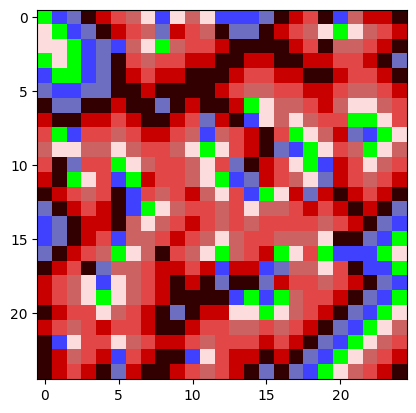

Kondisi Lingkungan Setelah 19 Hari :


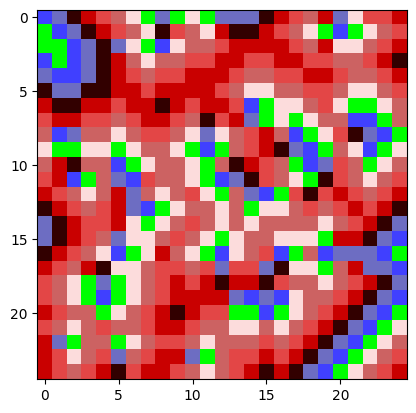

Kondisi Lingkungan Setelah 20 Hari :


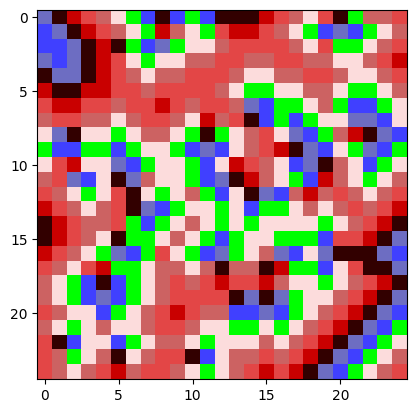

Kondisi Lingkungan Setelah 21 Hari :


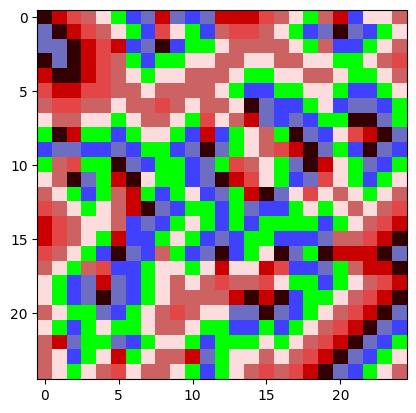

Kondisi Lingkungan Setelah 22 Hari :


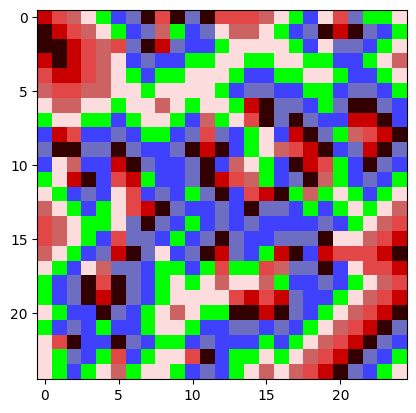

Kondisi Lingkungan Setelah 23 Hari :


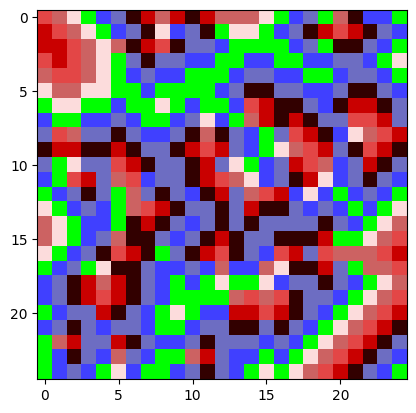

Kondisi Lingkungan Setelah 24 Hari :


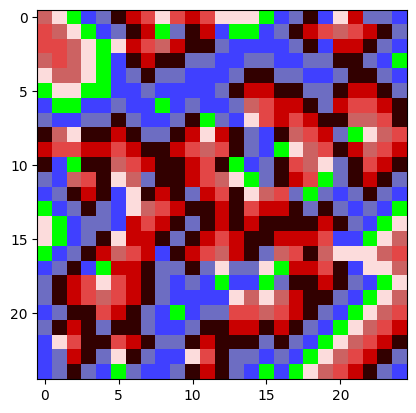

Kondisi Lingkungan Setelah 25 Hari :


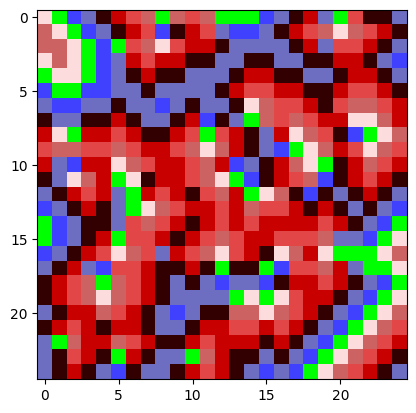

In [5]:
# Lakukan interasi pada plot sesuai dengan input

# Pembaruan untuk tiap iterasi terhadap nilai L dilakukan dengan skema berikut:
# 1) Jika nilai L=0 dan memiliki tetangga L=[1..2], maka L menjadi 1
# 2) Jika nilai L=[1..6], maka L menjadi L+1
# 3) Jika nilai L=7, maka L menjadi 0

for hari in range(iteration):
  print("Kondisi Lingkungan Setelah",hari+1,"Hari :")

  # Buat matriks L baru untuk menyimpan perubahan
  Lnew = np.array(L)

  for i in range(25):
    for j in range(25):

      # Skema 2
      if (1 <= L[i][j] <= 6):
        Lnew[i][j] = L[i][j] + 1
        #print("S2",i,j,L[i][j],Lnew[i][j])

      # Skema 3
      if (L[i][j] == 7):
        Lnew[i][j] = 0
        #print("S3",i,j,L[i][j],Lnew[i][j])

      # Skema 1
      if (L[i][j] == 0):

        # Cek barat
        if (j>0):
          if (1 <= L[i][j-1] <=2):
            Lnew[i][j] = 1
            #print("S1B",i,j,L[i][j],Lnew[i][j])
        # Cek timur
        if (j<24):
          if (1 <= L[i][j+1] <=2):
            Lnew[i][j] = 1
            #print("S1T",i,j,L[i][j],Lnew[i][j])
        # Cek utara
        if (i>0):
          if (1 <= L[i-1][j] <=2):
            Lnew[i][j] = 1
            #print("S1U",i,j,L[i][j],Lnew[i][j])
        # Cek selatan
        if (i<24):
          if (1 <= L[i+1][j] <=2):
            Lnew[i][j] = 1
            #print("S1S",i,j,L[i][j],Lnew[i][j])

  CetakGrid(Lnew, hari+1)
  #display(pd.DataFrame(Lnew))

  # Simpan matriks L baru ke L untuk digunakan pada iterasi selanjutnya
  L = np.array(Lnew)

In [6]:
# Jalankan animasi

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani.save('hasil_animasi.mp4', fps = 5)
plt.show()

# https://stackoverflow.com/questions/57377185/how-play-mp4-video-in-google-colab

from IPython.display import HTML
from base64 import b64encode
mp4 = open('hasil_animasi.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=500 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)